In [150]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

four_point_bendtest_data = pd.read_csv('./data/bend4Data.csv')
knoop_data = pd.read_csv('./data/KnoopDataWithIphone.csv')

knoop_data.head(5)

,Trial Number,Width (μm),Knoop from Width (GPa),Height (μm),Knoop from Height (GPa),Width iPhone(μm),Knoop from Width iPhone (GPa),Height iPhone(μm),Knoop from Height iPhone (GPa)
0,1,55.9,4553.5,54.9,4720.9,43.9,7383.0,50.8,5513.7
1,2,61.1,3811.4,56.8,4410.3,46.8,6496.6,46.1,6695.3
2,3,61.4,3774.3,49.5,5807.1,47.3,6359.9,49.2,5878.1
3,4,57.5,4303.6,54.1,4861.6,47.3,6359.9,49.4,5830.6
4,5,58.0,4229.0,59.1,4073.7,49.0,5926.2,49.3,5854.3


## Compression Test

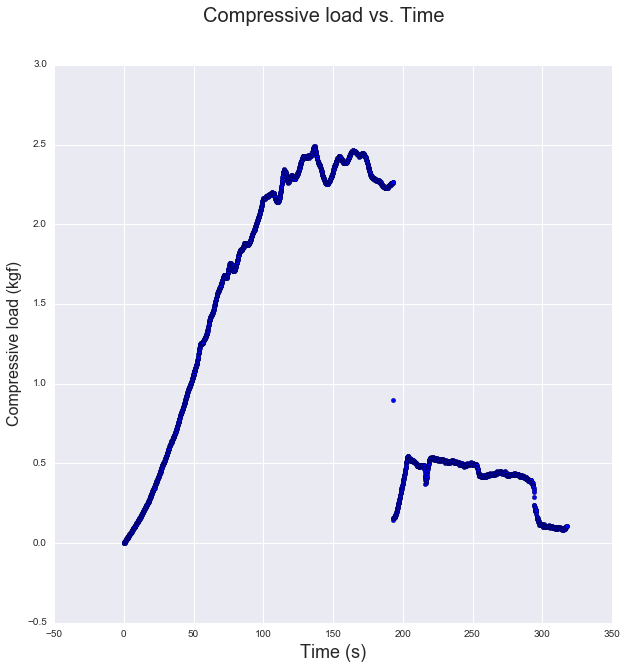

In [151]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(10,10)  # OR
plt.scatter(four_point_bendtest_data['Time (sec)'], four_point_bendtest_data['Compressive load (kgf)'])

fig.suptitle('Compressive load vs. Time', fontsize=20)
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Compressive load (kgf)', fontsize=16)
fig.savefig('time_compressiveLoad_4pointTest.jpg')

plt.show()

## Screen Protector Knoop Values

### Helper functions

In [152]:
def knoop_plotter(trials, data1, average, device, title, data2=None):
    knoopFig = plt.figure()
    knoopFig.set_size_inches(10,10)  
    if data2!=None:
        plt.scatter(knoop_data[trials],knoop_data[data1], c='red', label='Width-Measured Knoop Values')
        plt.scatter(knoop_data[trials],knoop_data[data2], c='blue', label='Height-Measured Knoop Values')
        knoopFig.suptitle('Knoop Value over different number of trials', fontsize=20)
    else:
        plt.scatter(knoop_data[trials],data1, c='blue', label='Height-Measured Knoop Values')
        
    plt.legend(frameon= True)
    if average==True:
        knoopFig.suptitle(device + ' Average Knoop Values' , fontsize=20)
    else:
        knoopFig.suptitle(device + ' Knoop Values', fontsize=20)

    plt.xlabel('Trial Number', fontsize=18)
    plt.ylabel('Knoop Value', fontsize=16)
    knoopFig.savefig(title)
    plt.show()

def get_avg_knoop(width, height):
    width_data = knoop_data[width]
    height_data = knoop_data[height]
    mean_data = []
    for i in range(len(width_data)):
        mean_value = (width_data[i]+height_data[i])/2.0
        mean_data.append(mean_value)
    return mean_data
        

## Graphs

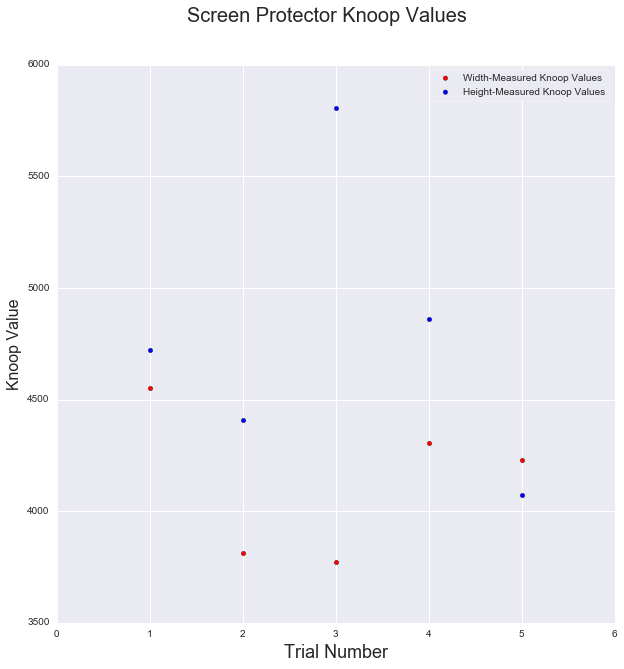

In [153]:
knoop_plotter('Trial Number', 'Knoop from Width (GPa)', False,"Screen Protector", 'knoop-measurements.jpg', 'Knoop from Height (GPa)')


Now we are going to take the mean of each trial attempt for the weight and height measurements and plot the average knoop value for each measurement.

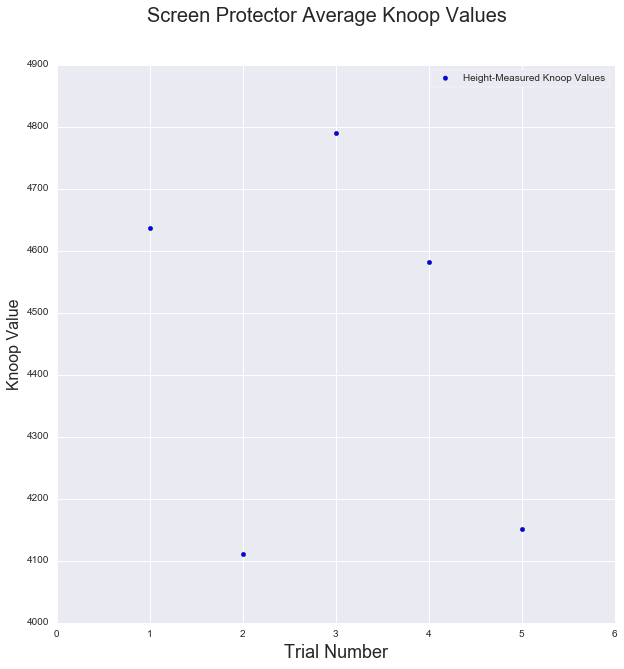

In [154]:
mean_data_screen_protector = get_avg_knoop('Knoop from Width (GPa)', 'Knoop from Height (GPa)')
knoop_plotter('Trial Number', mean_data_screen_protector, True, "Screen Protector", 'knoop-measurements-average.jpg')

## Numerical Results
### Average width and height diamond cracks on screen protector and average Knoop value


In [155]:
mean_knoop_value = np.mean(mean_data_screen_protector)
mean_width_diamond_crack = np.mean(knoop_data["Width (μm)"])
mean_height_diamond_crack = np.mean(knoop_data["Height (μm)"])

print "Average diamond-width crack on screen protector", mean_width_diamond_crack, "μm"
print "Average diamond-height crack on screen protector", mean_height_diamond_crack, "μm"
print "Extracted Knoop value of screen protector", mean_knoop_value

Average diamond-width crack on screen protector 58.78 μm
Average diamond-height crack on screen protector 54.88 μm
Extracted Knoop value of screen protector 4454.54


## Knoop Values of iPhone Screen Glass

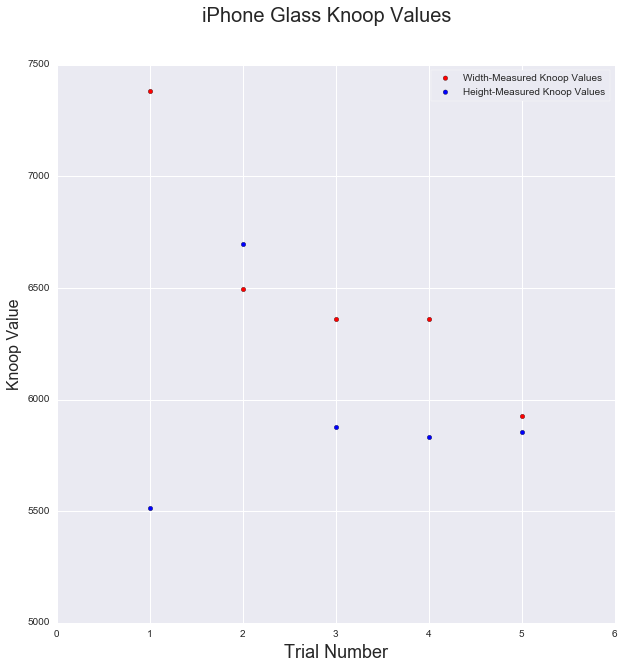

In [156]:
knoop_plotter('Trial Number', 'Knoop from Width iPhone (GPa)', False, "iPhone Glass", 'knoop-measurements-iphone.jpg','Knoop from Height iPhone (GPa)')

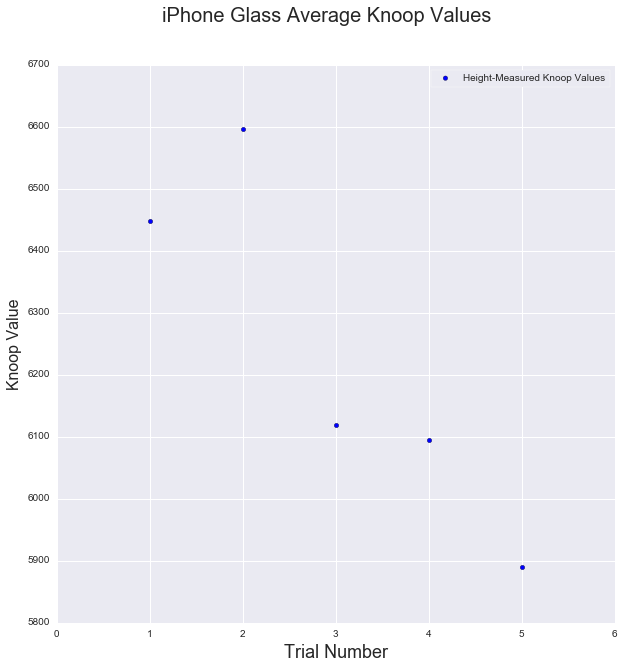

In [157]:
mean_data_iphone = get_avg_knoop('Knoop from Width iPhone (GPa)', 'Knoop from Height iPhone (GPa)')

knoop_plotter('Trial Number', mean_data_iphone, True, "iPhone Glass", 'knoop-measurements-iphone-average.jpg')

In [158]:
iphone_mean_knoop_value = np.mean(mean_data_iphone)
iphone_mean_width_diamond_crack = np.mean(knoop_data["Width iPhone(μm)"])
iphone_mean_height_diamond_crack = np.mean(knoop_data["Height iPhone(μm)"])

print "Average diamond-width crack on iPhone Glass", iphone_mean_width_diamond_crack, "μm"
print "Average diamond-height crack on iPhone Glass", iphone_mean_height_diamond_crack, "μm"
print "Extracted Knoop value of test screen glass", iphone_mean_knoop_value

Average diamond-width crack on iPhone Glass 46.86 μm
Average diamond-height crack on iPhone Glass 48.96 μm
Extracted Knoop value of test screen glass 6229.76


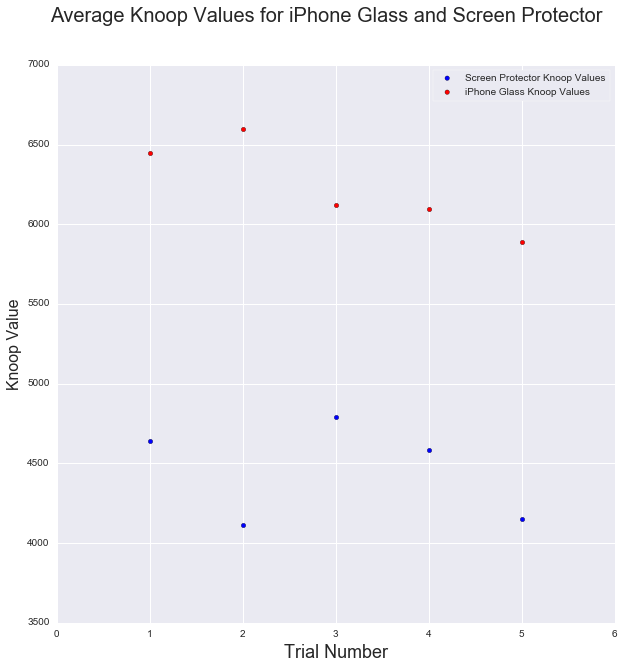

In [159]:
knoopFig = plt.figure()
knoopFig.set_size_inches(10,10)  
knoopFig.suptitle('Knoop Value over different number of trials', fontsize=20)

plt.scatter(knoop_data['Trial Number'],mean_data_screen_protector, c='blue', label='Screen Protector Knoop Values')
plt.scatter(knoop_data['Trial Number'],mean_data_iphone, c='red', label='iPhone Glass Knoop Values')

plt.legend(frameon= True)

knoopFig.suptitle('Average Knoop Values for iPhone Glass and Screen Protector', fontsize=20)
plt.xlabel('Trial Number', fontsize=18)
plt.ylabel('Knoop Value', fontsize=16)
plt.show()
knoopFig.savefig('knoop-measurements-average-iphone-and-screen')